## Project: Wrangling <span><i>Twitter</i></span> dataset

## Analyze by : Aaron.

##### Table of Content

###### Introduction
The dataset wangling in this project is the tweet archive of twitter user @dog_retes also known as WeRateDogs is a twitter account rates peopes dog with humorous comment an out the dog.
<p>The WeRateDige Twitter projet goals include:</p>
 
 <strong><li> Wrangling the twitter dats throught the following process:</li></strong>
 
   <div>
      <ol>
        <li>Gathering Date</li>
        <li>Assesing Data</li>
        <li>Cleaning Data</li>
     </ol>
   </div>
    
   
<strong><li> Storing Data</li></strong>
<strong><li> Analyzind and Visualizing Data</li></strong>
<strong><li> Reportiong</li></strong>
    <ul>
       <li>Data Wrangling</li>
       <li>Data Analysis and Visualizatin</li>
     </ul>
    

In [26]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import re
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data
On this data wrangling process the following are the data source of the project:
<p>
<ol>
    <li>The WeRateDogs Twitter archive. The twitter_archive_enhanced.csv file. This archive contains basic tweet data (tweet ID, timestamp, text, ...) for all 5000+ of their tweets as they stood on August 1, 2017.</li>
    <li>The tweet image predictions, i.e., what breed of dog (or another object, animal, etc.) is present in each tweet according to a neural network.</li>
    <li>The tweeter json text file downloaded from the Udaity class room</li>
</ol>
    
</p>

In [27]:
# Read the twitter archive dataset using pandas data frame
df_tweet_arc = pd.read_csv('~/Desktop/Twitter_data_analysis/twitter-archive-enhanced.csv')

In [28]:
# downloaded programmatically using the Requests library and the following URL: 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, allow_redirects=True)
with open('response.tsv', mode = 'wb') as file:
  file.write(response.content)

In [29]:
# Read the image predictions tab separated dataset using pandas data frame
df_image = pd.read_csv('response.tsv',sep = '\t')

In [30]:
# read the tweeter dataset
json_list = []
with open('tweet-json.txt', 'r') as myfile:
    for line in myfile:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        
        json_list.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
df_json_tweet = pd.DataFrame(json_list,columns=['tweet_id','favorite_count','retweet_count'])


In [31]:
# read the tweet_json.txt data into a Pandas DataFrame. 
df_json_tweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [32]:
# View the info of the tweet_json DataFrame
df_json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [33]:
# exploring the shape of tweet_json Data frame
df_json_tweet.shape

(2354, 3)

In [34]:
# exploring the image predictions datasets
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [35]:
# View the info of the image predictions datasets
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
# exploring the shape of  image predication dataset
df_image.shape

(2075, 12)

In [37]:
# exploring the tweet dataset
df_tweet_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [38]:
# View the info of the tweeter archive datasets
df_tweet_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [39]:
# exploring the shape of tweet dataset
df_tweet_arc.shape

(2356, 17)

### Assessing Data
##### <li>Visual Assessing each dataframes </li>

In [40]:
# before accessing  the dataset make copy of the original dataset
df_clean_twitter_archive = df_tweet_arc.copy()
df_clean_tweet_json = df_json_tweet.copy()
df_clean_image_predictions = df_image.copy()

In [41]:
df_clean_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [42]:
df_clean_tweet_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [43]:
df_clean_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### <li>Progrmmmatic Assesment each datasets using <span style='color:red'>Pandas</span></li>

In [44]:
df_clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [45]:
df_clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [46]:
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

###### Assesing the archive dataframe 

In [47]:
# Check duplicated in the table
sum(df_clean_twitter_archive.duplicated())

0

In [48]:
# let value count the raring numerator 
df_clean_twitter_archive.rating_numerator .value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [49]:
# print the tweet values
print(df_clean_twitter_archive.loc[df_clean_twitter_archive.rating_numerator ==143,'text'])
print(df_clean_twitter_archive.loc[df_clean_twitter_archive.rating_numerator ==1176,'text'])
print(df_clean_twitter_archive.loc[df_clean_twitter_archive.rating_numerator ==666,'text'])
print(df_clean_twitter_archive.loc[df_clean_twitter_archive.rating_numerator ==144,'text'])
print(df_clean_twitter_archive.loc[df_clean_twitter_archive.rating_numerator ==204,'text'])

1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
Series([], Name: text, dtype: object)
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [50]:
# verify numerators and denominators
#13 dogs
print(df_clean_twitter_archive['text'][1634])
#no Picture
print(df_clean_twitter_archive['text'][189])
#12 dogs
print(df_clean_twitter_archive['text'][1779])
# tweet 
print(df_clean_twitter_archive['text'][313])
#17 dogs
print(df_clean_twitter_archive['text'][1120])

Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


In [51]:
#let count the values of the denominator 
df_clean_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [52]:
print(df_clean_twitter_archive.loc[df_clean_twitter_archive.rating_denominator == 7, 'text'])
print(df_clean_twitter_archive.loc[df_clean_twitter_archive.rating_denominator == 15, 'text'])
print(df_clean_twitter_archive.loc[df_clean_twitter_archive.rating_denominator == 96, 'text'])
print(df_clean_twitter_archive.loc[df_clean_twitter_archive.rating_denominator == 2, 'text'])
print(df_clean_twitter_archive.loc[df_clean_twitter_archive.rating_denominator == 120, 'text'])

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
Series([], Name: text, dtype: object)
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [53]:
#no rating
print(df_clean_twitter_archive['text'][516]) 

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [54]:
# 
print(df_clean_twitter_archive['text'][342]) 

@docmisterio account started on 11/15/15


In [55]:
print(df_clean_twitter_archive['text'][2335]) 

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [56]:
print(df_clean_twitter_archive['text'][1779]) 

IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [57]:
df_clean_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [58]:
# display the statistical description of the dataset
df_clean_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


##### Assesing the tweet json dataframe

In [59]:
# display few bottom values
df_clean_tweet_json.tail()

,tweet_id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [60]:
# display non-null value of the data frame
df_clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [61]:
# display the the statistical description of the data frame
df_clean_tweet_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


##### Assesing the Image predictive dataframe

In [62]:
# display few the top datasets
df_clean_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [63]:
# display the the statistical description of the data frame
df_clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [64]:
# check duplicates 
sum(df_clean_image_predictions.duplicated())

0

In [65]:
# Check number of  p1 in the data frame
df_clean_image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [66]:
# Check number of  p2 in the data frame
df_clean_image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [67]:
# Check number of  p3 in the data frame
df_clean_image_predictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

### Cleaning DataSets
   <p>Programmatic Data cleaning</p>
    <ul>
       <li>Define</li>
        <li>Code</li>
        <li>Test</li>
</ul>
</p>

#### Quality 
<p>
<ul>
 <li>Merge the <strong>df_clean_twitter_archive</strong>, <strong>df_clean_image_predictions</strong>, and      <strong>tweet_clean_json</strong> dataframes in to one datasets.</li>

<li>Delete retweets</li>
    <li>Remove columns no longer needed</li>
    <li>Change tweet_id from an integer to a string</li>
    <li>Change the timestamp to correct datetime format</li>
   <li>Correct naming issues</li>
    <li>Standardize dog ratings</li>
    <li>Creating a new dog_breed column using the image prediction data</li>
</ul>
</p>

### Tidiness

<p>
<ul>
<li>Create one column for the various dog types: doggo, floofer, pupper, puppo Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp</li>
    <li>Join archive, predictions and tweet_json tables</li>
</ul>
</p>

### Define
<p>
<li>Merge the <strong>df_clean_twitter_archive</strong>, <strong>df_clean_image_predictions</strong>, and      <strong>tweet_clean_json</strong> dataframes in to one datasets.</li>
 </p>

#### Code

In [68]:
df_merge = pd.concat([df_clean_twitter_archive, df_clean_image_predictions, df_clean_tweet_json], join='outer', axis=1)

### Test

In [69]:
# display the few top data frame
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,8.918152e+17,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,8.913276e+17,41048.0,9774.0


In [70]:
# display the columns list 
list(df_merge.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'tweet_id',
 'favorite_count',
 'retweet_count']

In [71]:
# display the non-null values with its datatypes
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Define
<p><li>Create one column for the various 'dog_type</li></p>

### Code

In [104]:
# using string extract methods 
df_merge['dog_type'] = df_merge['text'].str.extract('(doggo|floofer|pupper|puppo)')


### Test

In [73]:
# display few dataset 
df_merge[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].head()

,dog_type,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None


In [74]:
# lets count count the dog_type column
df_merge.dog_type.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

In [75]:
# check the null values 
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Define
<p>
    <li>Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp</li>
 </p>

### Code

In [76]:
# removed the unnecessary columns
df_merge = df_merge.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [77]:
df_merge.drop(['in_reply_to_status_id','in_reply_to_user_id','source','img_num','source'], axis = 1,inplace = True)

### Test

In [78]:
df_merge.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,39467.0,8853.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,33819.0,6514.0,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,malinois,0.138584,True,bloodhound,0.116197,True,8.918152e+17,25461.0,4328.0,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,42908.0,8964.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,Rottweiler,0.243682,True,Doberman,0.154629,True,8.913276e+17,41048.0,9774.0,NaN


### Define
<p><li>Removing duplicated columns in the data frames</li></P>

### Code

#### <a href = "https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns">stackoverflow</a>

In [79]:
# remove duplicated columns
df_merge = df_merge.loc[:,~df_merge.columns.duplicated()]

#### Test

In [80]:
sum(df_merge.duplicated())

0

### Define
<p>
   <li>Change tweet_id from an integer to a string</li>
 </p>

### Code

#### <a href = "https://www.statology.org/convert-datetime-to-date-pandas"/>link</a>

In [81]:
# data type conversion of the tweet_id
df_merge.tweet_id = df_merge.tweet_id.astype(str)

### Test

In [82]:
# Check the above changes
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   object 
 1   timestamp           2356 non-null   object 
 2   text                2356 non-null   object 
 3   expanded_urls       2297 non-null   object 
 4   rating_numerator    2356 non-null   int64  
 5   rating_denominator  2356 non-null   int64  
 6   name                2356 non-null   object 
 7   doggo               2356 non-null   object 
 8   floofer             2356 non-null   object 
 9   pupper              2356 non-null   object 
 10  puppo               2356 non-null   object 
 11  jpg_url             2075 non-null   object 
 12  p1                  2075 non-null   object 
 13  p1_conf             2075 non-null   float64
 14  p1_dog              2075 non-null   object 
 15  p2                  2075 non-null   object 
 16  p2_con

### Define
<p><li>Change the timestamp to correct datetime format</li></p>

### Code

In [83]:
# convert the timestamp to standard ISO format
df_merge['timestamp'] = pd.to_datetime(df_merge['timestamp'], format='%Y-%m-%d %H:%M:%S')

### Test

In [84]:
df_merge.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,39467.0,8853.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,33819.0,6514.0,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,True,malinois,0.138584,True,bloodhound,0.116197,True,25461.0,4328.0,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,42908.0,8964.0,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41048.0,9774.0,NaN


### Define
<p><li>Correct naming issues</li></p>

### Code

In [85]:
# removing any naming issues 
df_merge.name = df_merge.name.str.replace('^[a-z]+', 'None')

/var/folders/9s/3_yd7q9j0y33cb8h3dv8psvm0000gn/T/ipykernel_59745/3942086512.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_merge.name = df_merge.name.str.replace('^[a-z]+', 'None')


### Test

In [86]:
df_merge.name.sample(10)

182        Luna
1273      Penny
549     Shooter
1723       None
1441      Misty
1262      Tater
1881      Laela
1893       None
2173       Ralf
1741        Evy
Name: name, dtype: object

### Define
<p><li>Converting the data type of 'rating_numerator' and 'rating_denominator'</li><p>

### Code

In [87]:
# Convert the data types of the rating_numerator to float
df_merge['rating_numerator'] = df_merge['rating_numerator'].astype(float)

In [88]:
# Convert the data types of the rating_denominator to float
df_merge['rating_denominator'] = df_merge['rating_denominator'].astype(float)

### Test

In [89]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   expanded_urls       2297 non-null   object             
 4   rating_numerator    2356 non-null   float64            
 5   rating_denominator  2356 non-null   float64            
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
 11  jpg_url             2075 non-null   object             
 12  p1                  2075 non-null 

### Define
<p><li>Standardize dog ratings</li></p>

### Code

In [90]:
#  using regex using loops to all text indices, and ratings for tweets that contain a decimal in the numerator of the rating
ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in df_merge['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# display decimals        
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

### Test

In [91]:
# display the returning decimal index
ratings_decimals_index

[45, 340, 695, 763, 1689, 1712]

In [92]:
#Correctly converting the above decimal ratings to float
df_merge.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
df_merge.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
df_merge.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
df_merge.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])

In [93]:
df_merge.loc[40]

tweet_id                                             884562892145688576
timestamp                                     2017-07-11 00:00:02+00:00
text                  This is Kevin. He's just so happy. 13/10 what ...
expanded_urls         https://twitter.com/dog_rates/status/884562892...
rating_numerator                                                   13.0
rating_denominator                                                 10.0
name                                                              Kevin
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
jpg_url                 https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg
p1                                                      German_shepherd
p1_conf                                                        0

### Define
<p><li>Creating new columns for dog rating</li></p>

### Code

In [94]:
# put a  new column called rating, and calculate the value with new, standardized ratings
df_merge['rating'] = df_merge['rating_numerator'] / df_merge['rating_denominator']

### Test

In [95]:
df_merge.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,39467.0,8853.0,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,33819.0,6514.0,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,malinois,0.138584,True,bloodhound,0.116197,True,25461.0,4328.0,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,42908.0,8964.0,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,Rottweiler,0.243682,True,Doberman,0.154629,True,41048.0,9774.0,NaN,1.2


### Define
<p><li>Creating a new dog_breed column using the image prediction data</li><p>

### COde

In [96]:
df_merge['dog_breed'] = 'None'

for i, row in df_merge.iterrows():

    if row.p1_dog:
        df_merge.at[i, 'dog_breed'] = row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        df_merge.at[i, 'dog_breed'] = row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        df_merge.at[i, 'dog_breed'] = row.p3
    else:
        df_merge.at[i, 'dog_breed'] = None

### Test

In [97]:
df_merge.dog_breed.value_counts()

golden_retriever        168
Labrador_retriever      110
Chihuahua                94
Pembroke                 94
pug                      64
                       ... 
Scotch_terrier            1
Japanese_spaniel          1
standard_schnauzer        1
EntleBucher               1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 112, dtype: int64

### Storing Data


In [114]:
# storing new data frame
df_merge.to_csv("twitter_archive_master.csv",encoding='utf-8',index = False)

### Analyzing & Visualizing Data
<p>
   <ul>
       <li>Visualizing the most popular dog breed</li>
       <li>Visualizing the retweet counts and favorite counts over time</li>
       <li>Visualize the number of tweets over time acessing or decending .
</ul>
</p>

In [115]:
#
df_merge.dog_type.value_counts()


pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

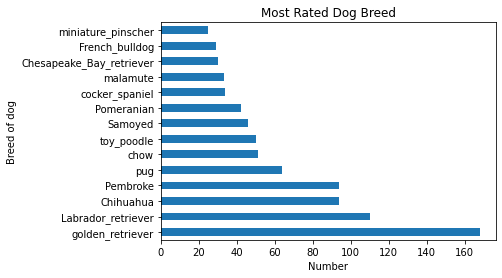

In [116]:
# Histogram to visualize dog breeeds
dog_breed = df_merge.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Number')
plt.ylabel('Breed of dog');

In [117]:
df_merge.timestamp = pd.to_datetime(df_merge['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = df_merge.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

/var/folders/9s/3_yd7q9j0y33cb8h3dv8psvm0000gn/T/ipykernel_59745/1228220477.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monthly_tweets.sum()


tweet_id    2356
dtype: int64

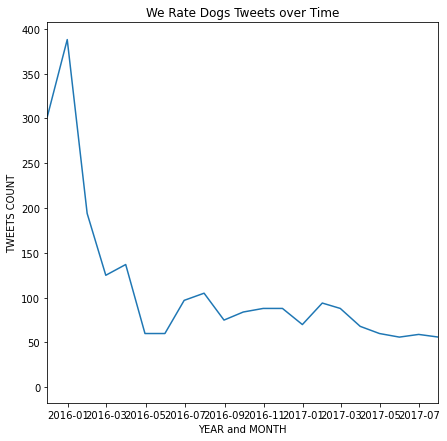

In [118]:
# Plotting time vs. tweets

plt.figure(figsize=(7, 7));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('YEAR and MONTH')
plt.ylabel('TWEETS COUNT')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

/Users/muluneh/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


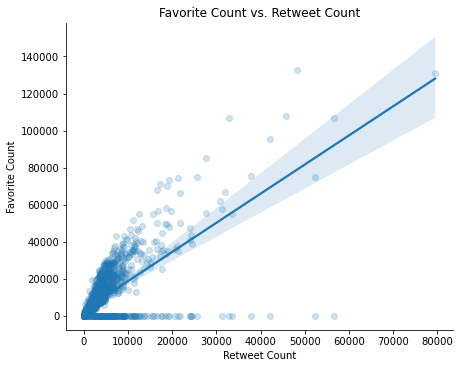

In [119]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_merge,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

In [122]:
df_merge['favorite_count'].corr(df_merge['retweet_count'])

0.7028813596145035

 The above scatter plot shows there is a positive correlation between favorite and Retweet.